In [65]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import preprocessing


In [66]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [166]:
# loading dataset
df_sdc = pd.read_csv(r"C:\Users\hp\Desktop\ALY6020 Predictive Analytics\A2\CAR.csv")


## Part 1 : Data Cleanning

In [167]:
df_sdc.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [168]:
# Checking for the missing values

df_sdc.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [169]:
## now checking the summary of the DataFrame

df_sdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [170]:
# Checking the summary statistics for numerical attributes

df_sdc.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


### Working for variable 'Horsepower'

In [171]:
## Checking unique values

df_sdc.Horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

we can see "?" values

In [172]:
# replace '?' with NaN and convert to float

df_sdc['Horsepower'] = pd.to_numeric(df_sdc['Horsepower'], errors='coerce')

In [173]:
df_sdc.Horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [174]:
df_sdc['Horsepower'].isnull().sum()

6

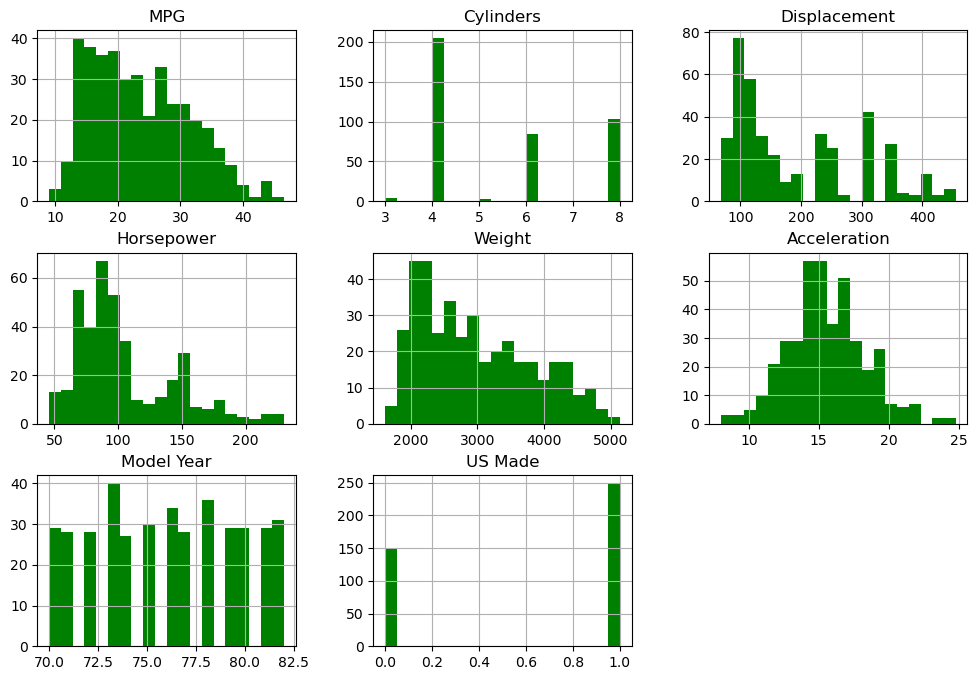

In [175]:
# Seeing the Histograms of different variables

df_sdc.hist(figsize=(12,8),bins=20, color='green')

#plt.xticks(range(0, 240, 20))

plt.show()

1.5% of the values are null in column 'Horsepower'. Will replace the nan values with median becuase the distribution is skewed.

In [176]:
# fill missing values with the mean

hp_median = df_sdc['Horsepower'].median()
df_sdc['Horsepower'].fillna(hp_median, inplace=True)

# changing the type to integer

df_sdc['Horsepower'] = df_sdc['Horsepower'].astype(int)

In [177]:
## checking data types

df_sdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    int32  
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 23.4 KB


In [178]:
# Checking the summary statistics for numerical attributes

df_sdc.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


In [179]:
## checking for duplicated observation or null values.

# counting the no. of duplicated values

duplicate_num = (df_sdc.duplicated()).sum()
print(f"Number of duplicated rows: {duplicate_num}")

# counting the no. of null values

null_num = df_sdc.isnull().sum().sum()
print(f"Number of null values: {null_num}")

Number of duplicated rows: 0
Number of null values: 0


In [180]:
## Once cleaning of the data is done, now we will see summary.

df_sdc.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


### Working for variable 'Cylinders'

In [181]:
# seeing the unique values of variable cylinders

df_sdc['Cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

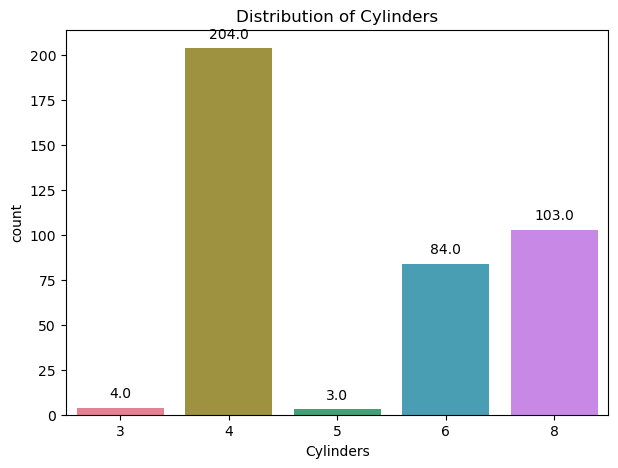

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(df_sdc["Cylinders"].unique()))

fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="Cylinders", data=df_sdc, ax=ax, palette=custom_palette)
ax.set_title("Distribution of Cylinders")

# Adding count values above each column
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [183]:
# now calculating the percentage of the cylinder distribution in the dataset

count_cylinder = df_sdc['Cylinders'].value_counts(normalize=True) * 100
print(count_cylinder)

4    51.256281
8    25.879397
6    21.105528
3     1.005025
5     0.753769
Name: Cylinders, dtype: float64


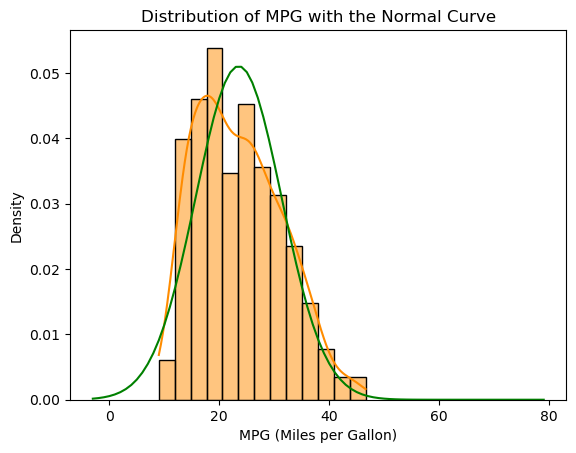

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm  # Import norm from scipy.stats

# Plot the histogram with Seaborn
sns.histplot(data=df_sdc, x="MPG", kde=True, stat="density", alpha=0.5, color="darkorange")

# Plot the normal distribution curve
plt.plot(
    range(-3, 80),
    norm.pdf(range(-3, 80), loc=df_sdc["MPG"].mean(), scale=df_sdc["MPG"].std()),
    color="green"
)

# Set plot title and labels
plt.title("Distribution of MPG with the Normal Curve", fontsize=12)
plt.xlabel("MPG (Miles per Gallon)", fontsize=10)
plt.ylabel("Density", fontsize=10)

# Show the plot
plt.show()


In [185]:
# Checking for outliers

# Calculating IQR for numeric columns in dataset

Q1 = df_sdc.quantile(0.25)
Q3 = df_sdc.quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds for the outliers

bound_lower = Q1 - 1.5 * IQR
bound_upper = Q3 + 1.5 * IQR

# Finding outliers in numeric columns

outlier = ( df_sdc < bound_lower) | ( df_sdc > bound_upper)
outlier = outlier.any(axis=1)
print(outlier)

# Counting number of outliers in the columns 

outliers_num = outlier.sum()
print(f'There are {outliers_num} outliers in the dataset')


0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394     True
395    False
396    False
397    False
Length: 398, dtype: bool
There are 18 outliers in the dataset


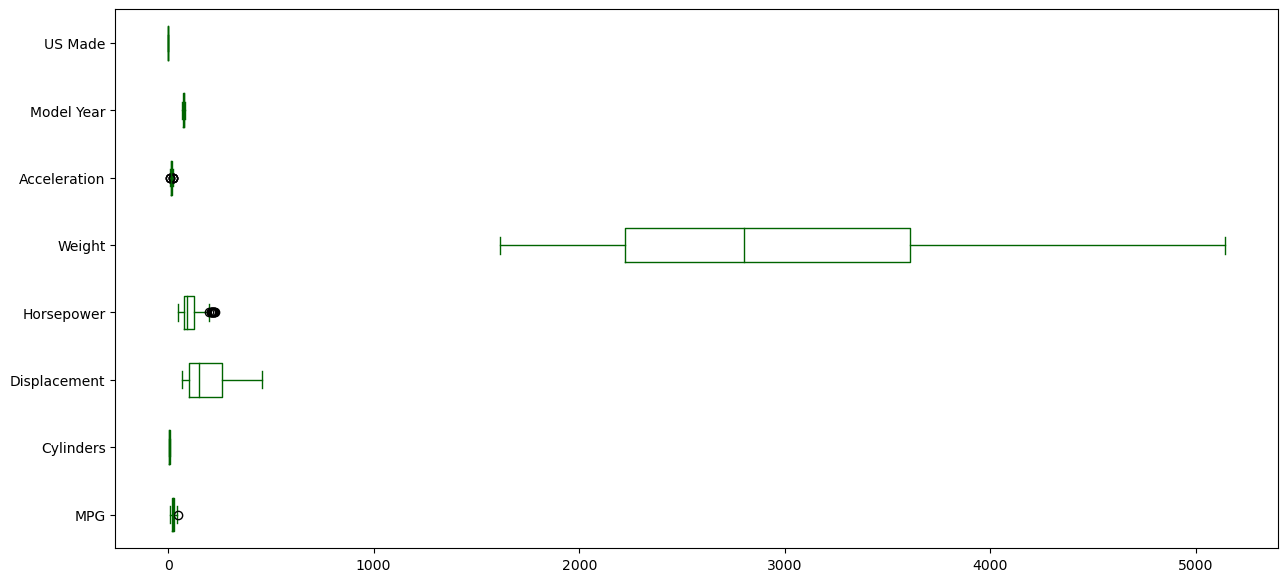

In [186]:
# Creating the box plot for all the variables in dataset

df_sdc.plot(kind='box', vert=False, figsize=(15,7), color='darkgreen')
plt.show()

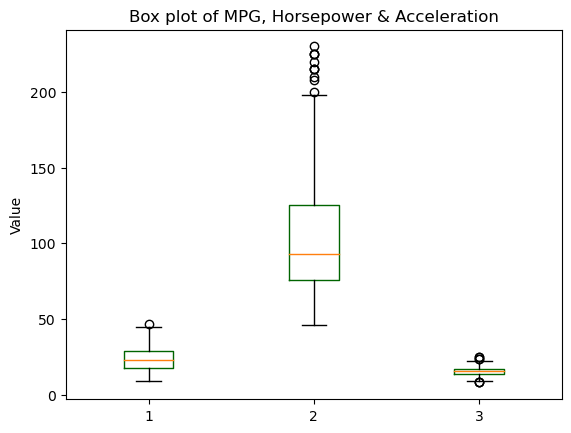

In [187]:
# Creating box plot for "mpg" and the "cylinders" variables

plt.boxplot([df_sdc['MPG'], df_sdc['Horsepower'], df_sdc['Acceleration']], boxprops=dict(color='darkgreen'))
plt.title('Box plot of MPG, Horsepower & Acceleration')
plt.ylabel('Value')
plt.show()


In [188]:
# Calculating IQR for "mpg" column

Q1 = df_sdc['MPG'].quantile(0.25)
Q3 = df_sdc['MPG'].quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds for the detection of outlier
bound_lower = Q1 - 1.5* IQR
bound_upper = Q3 + 1.5* IQR

# Printing outlier values
outlier = df_sdc[(df_sdc['MPG'] < bound_lower) | (df_sdc['MPG'] > bound_upper)]
print(outlier)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
322  46.6          4          86.0          65    2110          17.9   

     Model Year  US Made  
322          80        0  


In [189]:
# Calculating IQR for "Horsepower" column

Q1 = df_sdc['Horsepower'].quantile(0.25)
Q3 = df_sdc['Horsepower'].quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds for the detection of outlier
bound_lower = Q1 - 1.5* IQR
bound_upper = Q3 + 1.5* IQR

# Printing the outlier values
outlier = df_sdc[(df_sdc['Horsepower'] < bound_lower) | (df_sdc['Horsepower'] > bound_upper)]
print(outlier)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
6    14.0          8         454.0         220    4354           9.0   
7    14.0          8         440.0         215    4312           8.5   
8    14.0          8         455.0         225    4425          10.0   
13   14.0          8         455.0         225    3086          10.0   
25   10.0          8         360.0         215    4615          14.0   
26   10.0          8         307.0         200    4376          15.0   
27   11.0          8         318.0         210    4382          13.5   
67   11.0          8         429.0         208    4633          11.0   
94   13.0          8         440.0         215    4735          11.0   
95   12.0          8         455.0         225    4951          11.0   
116  16.0          8         400.0         230    4278           9.5   

     Model Year  US Made  
6            70        1  
7            70        1  
8            70        1  
13           70        1  


In [190]:
# Calculating IQR for "Acceleration" column

Q1 = df_sdc['Acceleration'].quantile(0.25)
Q3 = df_sdc['Acceleration'].quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds for the detection of outlier
bound_lower = Q1 - 1.5* IQR
bound_upper = Q3 + 1.5* IQR

# Printing the outlier values
outlier = df_sdc[(df_sdc['Acceleration'] < bound_lower) | (df_sdc['Acceleration'] > bound_upper)]
print(outlier)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
7    14.0          8         440.0         215    4312           8.5   
9    15.0          8         390.0         190    3850           8.5   
11   14.0          8         340.0         160    3609           8.0   
59   23.0          4          97.0          54    2254          23.5   
299  27.2          4         141.0          71    3190          24.8   
326  43.4          4          90.0          48    2335          23.7   
394  44.0          4          97.0          52    2130          24.6   

     Model Year  US Made  
7            70        1  
9            70        1  
11           70        1  
59           72        0  
299          79        0  
326          80        0  
394          82        0  


<Axes: >

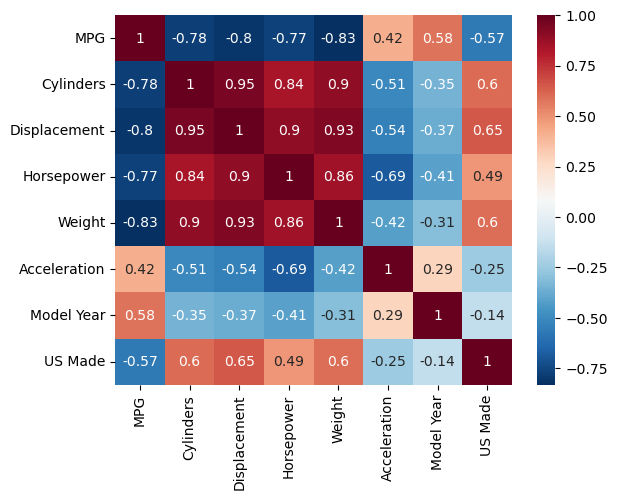

In [191]:
## Now checking correlation of the variables

corr_sd = df_sdc.corr()

sns.heatmap(corr_sd, cmap='RdBu_r', annot=True)

## Part 2 : Modelling

In [192]:
## Using VIF to check the multicolinearity 

# Creating a DataFrame with independent variables
X = df_sdc[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'US Made']]

# Scaling the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculating VIF for each independent-variable

VIF = pd.DataFrame()
VIF["variables"] = X.columns
VIF["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X.shape[1])]

# Viewing the results
print(VIF)

      variables        VIF
0     Cylinders  10.672769
1  Displacement  22.967019
2    Horsepower   9.455393
3        Weight  10.526455
4  Acceleration   2.555258
5    Model Year   1.253558
6       US Made   1.929796


In [193]:
## Dropping columns that have high VIF values (correlated).

new_sdc = df_sdc.drop(['Cylinders','Displacement','Weight'],axis=1)

# Creating DataFrame with independent variables

X = new_sdc[['MPG', 'Horsepower', 'Acceleration', 'Model Year', 'US Made']]

# Scaling independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculating VIF for each independent variable
VIF = pd.DataFrame()
VIF["variables"] = X.columns
VIF["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X.shape[1])]

# View the results
print(VIF)

      variables       VIF
0           MPG  4.060734
1    Horsepower  4.210884
2  Acceleration  2.044382
3    Model Year  1.663215
4       US Made  1.613268


In [194]:

# Creating DataFrame of independent variables
X = new_sdc.drop('MPG',axis=1) 
# Creating a series of the dependent variable
y = new_sdc.MPG   

ss = StandardScaler()
X_std = ss.fit_transform(X)

#taking test size as 0.2
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state= 123)

In [195]:
# printing the output

print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (318, 4)
X_test shape (80, 4)
y_train shape (318,)
y_test shape (80,)


In [196]:
# using OLS (Ordinary Least Squares) regression

X2 = sm.add_constant(X_train)

# creating ordinary least squares (OLS) regression model
ols = sm.OLS(y_train,X2)
result = ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     257.2
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.39e-97
Time:                        20:58:19   Log-Likelihood:                -874.80
No. Observations:                 318   AIC:                             1760.
Df Residuals:                     313   BIC:                             1778.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5502      0.214    109.822      0.0

In [197]:
# copying

df_sdc2 = df_sdc
df_sdc2.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [198]:
# Creating DataFrame of independent variables
X = df_sdc2.drop('MPG',axis=1) 
# Creating a series of the dependent variable
y = df_sdc2.MPG   

ss = StandardScaler()
X_std = ss.fit_transform(X)

#taking test size as 0.2
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state= 123)

In [199]:
# printing the output

print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (318, 7)
X_test shape (80, 7)
y_train shape (318,)
y_test shape (80,)


In [200]:
# using OLS (Ordinary Least Squares) regression

X2 = sm.add_constant(X_train)

# creating ordinary least squares (OLS) regression model
ols = sm.OLS(y_train,X2)
result = ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     221.4
Date:                Sun, 12 Nov 2023   Prob (F-statistic):          1.48e-116
Time:                        20:58:47   Log-Likelihood:                -821.40
No. Observations:                 318   AIC:                             1659.
Df Residuals:                     310   BIC:                             1689.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5508      0.182    129.282      0.0

## Part 3 : Model Optimization 

In [201]:
## Now performing Forward feature selector

from mlxtend.feature_selection import SequentialFeatureSelector

In [202]:
# Separating target variable and independent variables

X = df_sdc2.drop(['MPG'], axis=1)
y = df_sdc2['MPG']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [203]:
from sklearn.ensemble import RandomForestRegressor

# checking the shape 
X_train.shape

(318, 7)

In [204]:
# feature selection using a Sequential Forward Selection (SFS) approach
## Using RandomForestRegressor for forward selection (with 5 features)
estimator_ran = RandomForestRegressor(n_estimators=100, random_state= 40)

# Applying Sequential Feature Selector (SFS)
sfs = SequentialFeatureSelector(estimator_ran, forward = True, k_features= 5).fit(X_train,y_train)

sfs.k_feature_names_

('Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year')

In [205]:
# Now Newly Optimized data
# dropping unwanted variables
df_sdc_opt = df_sdc.drop([ 'Cylinders', 'US Made'], axis =1)

# Linear Regression Model for the newly optimized data.
X = df_sdc_opt.drop(['MPG'], axis=1)
y = df_sdc_opt['MPG']

# Splitting the data into train and the test sets (test size as  0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

X2 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X2)
result = ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     249.6
Date:                Sun, 12 Nov 2023   Prob (F-statistic):          9.53e-107
Time:                        20:59:38   Log-Likelihood:                -845.51
No. Observations:                 318   AIC:                             1703.
Df Residuals:                     312   BIC:                             1726.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.3679      5.324     -3.262   

In [206]:
# feature selection using a Sequential Forward Selection (SFS) approach
## Using RandomForestRegressor for forward selection (with 4 features)
estimator_ran = RandomForestRegressor(n_estimators=100, random_state= 40)

# Applying Sequential Feature Selector (SFS)
sfs = SequentialFeatureSelector(estimator_ran, forward = True, k_features= 4).fit(X_train,y_train)

sfs.k_feature_names_

('Horsepower', 'Weight', 'Acceleration', 'Model Year')

In [207]:
# Now Newly Optimized data
# dropping unwanted variables
df_sdc_opt = df_sdc.drop([ 'Cylinders','Displacement', 'US Made'], axis =1)

# Linear Regression Model for the newly optimized data.
X = df_sdc_opt.drop(['MPG'], axis=1)
y = df_sdc_opt['MPG']

# Splitting the data into train and the test sets (test size as  0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

X2 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X2)
result = ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     311.9
Date:                Sun, 12 Nov 2023   Prob (F-statistic):          7.98e-108
Time:                        21:00:07   Log-Likelihood:                -845.97
No. Observations:                 318   AIC:                             1702.
Df Residuals:                     313   BIC:                             1721.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2705      5.322     -3.245   

In [208]:
# feature selection using a Sequential Forward Selection (SFS) approach
## Using RandomForestRegressor for forward selection (with 3 features)
estimator_ran = RandomForestRegressor(n_estimators=100, random_state= 40)

# Applying Sequential Feature Selector (SFS)
sfs = SequentialFeatureSelector(estimator_ran, forward = True, k_features= 3).fit(X_train,y_train)

sfs.k_feature_names_

('Horsepower', 'Weight', 'Model Year')

In [209]:
# Now Newly Optimized data
# dropping unwanted variables
df_sdc_opt = df_sdc.drop([ 'Cylinders','Displacement', 'Acceleration','US Made'], axis =1)

# Linear Regression Model for the newly optimized data.
X = df_sdc_opt.drop(['MPG'], axis=1)
y = df_sdc_opt['MPG']

# Splitting the data into train and the test sets (test size as  0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

X2 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X2)
result = ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     415.9
Date:                Sun, 12 Nov 2023   Prob (F-statistic):          5.37e-109
Time:                        21:00:31   Log-Likelihood:                -846.38
No. Observations:                 318   AIC:                             1701.
Df Residuals:                     314   BIC:                             1716.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.9432      4.642     -3.219      0.0

In [210]:
# feature selection using a Sequential Forward Selection (SFS) approach
## Using RandomForestRegressor for forward selection (with 2 features)
estimator_ran = RandomForestRegressor(n_estimators=100, random_state= 40)

# Applying Sequential Feature Selector (SFS)
sfs = SequentialFeatureSelector(estimator_ran, forward = True, k_features= 2).fit(X_train,y_train)

sfs.k_feature_names_

('Horsepower', 'Model Year')

In [211]:
# Now Newly Optimized data
# dropping unwanted variables
df_sdc_opt = df_sdc.drop([ 'Cylinders','Weight', 'Acceleration','Model Year','US Made'], axis =1)

# Linear Regression Model for the newly optimized data.
X = df_sdc_opt.drop(['MPG'], axis=1)
y = df_sdc_opt['MPG']

# Splitting the data into train and the test sets (test size as  0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

X2 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X2)
result = ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     286.7
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.20e-71
Time:                        21:01:03   Log-Likelihood:                -936.57
No. Observations:                 318   AIC:                             1879.
Df Residuals:                     315   BIC:                             1890.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           37.6740      0.843     44.694   